In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
df= pd.read_csv("cleaning_data.csv")
df=df.drop(columns=["Unnamed: 0"])
df

,Rank,Name,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,...,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG,Height,Weight
0,1,Michael Jordan,1072,38.3,11.4,22.9,0.497,0.5,1.7,0.327,...,2.6,1.6,4.7,6.2,5.3,2.3,0.8,30.1,198.12,97.975872
1,7,Allen Iverson,914,41.1,9.3,21.8,0.425,1.2,3.7,0.313,...,1.9,0.8,2.9,3.7,6.2,2.2,0.2,26.7,182.88,74.842680
2,14,Karl Malone,1476,37.2,9.2,17.8,0.516,0.1,0.2,0.274,...,3.1,2.4,7.7,10.1,3.6,1.4,0.8,25.0,205.74,116.119552
3,15,Kobe Bryant,1346,36.1,8.7,19.5,0.447,1.4,4.1,0.329,...,2.5,1.1,4.1,5.2,4.7,1.4,0.5,25.0,200.66,90.718400
4,17,Dominique Wilkins,1074,35.5,9.3,20.1,0.461,0.7,2.1,0.319,...,1.9,2.7,3.9,6.7,2.5,1.3,0.6,24.8,203.20,104.326160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,4491,Pepe Sanchez,38,4.9,0.2,0.9,0.273,0.0,0.0,0.000,...,0.6,0.2,0.4,0.6,1.3,0.4,0.0,0.5,193.04,88.450440
1638,4493,London Perrantes,14,4.7,0.1,0.9,0.154,0.0,0.2,0.000,...,0.4,0.1,0.2,0.3,0.4,0.1,0.1,0.5,187.96,86.182480
1639,4499,Charles Cooke,13,2.9,0.2,1.1,0.143,0.1,0.6,0.125,...,0.0,0.0,0.2,0.2,0.1,0.1,0.0,0.5,195.58,88.904032
1640,4504,Will Conroy,16,6.7,0.2,1.4,0.136,0.0,0.4,0.000,...,0.8,0.2,0.4,0.7,1.0,0.0,0.0,0.4,187.96,88.450440


0-100      593
100-400    417
700+       328
400-700    304
Name: Games_Played, dtype: int64


<AxesSubplot:ylabel='Games_Played'>

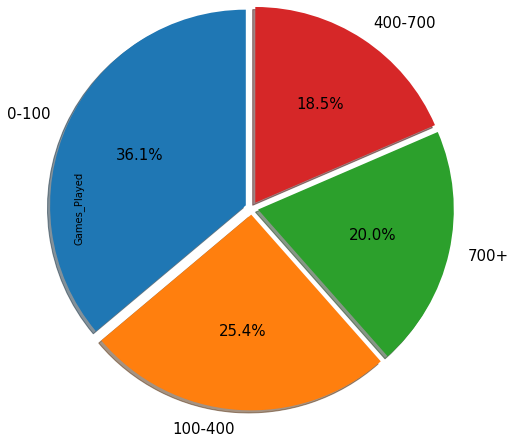

In [8]:
df['Games_Played'] = pd.cut(df['GP'],bins=[0,100,400,700,3000], labels=["0-100","100-400","400-700","700+"])
gp = df.groupby('Games_Played').size()
gp = df['Games_Played'].value_counts()
print(gp)
gp.plot.pie(autopct='%1.1f%%',shadow=True,startangle=90,explode=(0.05, 0.05,0.05,0.05),radius=1.5,figsize=(7,6),textprops={'fontsize':15})

0-5      801
5-10     553
10-20    271
20+       17
Name: points_pergame, dtype: int64


<AxesSubplot:ylabel='points_pergame'>

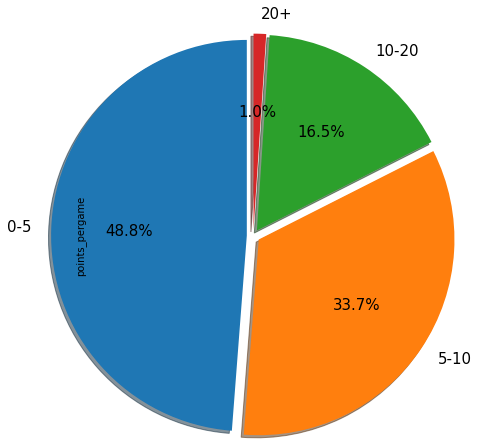

In [16]:
df['points_pergame'] = pd.cut(df['PPG'],bins=[0,5,10,20,35], labels=["0-5","5-10","10-20","20+"])
gp = df.groupby('points_pergame').size()
gp = df['points_pergame'].value_counts()
print(gp)
gp.plot.pie(autopct='%1.1f%%',shadow=True,startangle=90,explode=(0.05, 0.05,0.05,0.05),radius=1.5,figsize=(7,6),textprops={'fontsize':15})

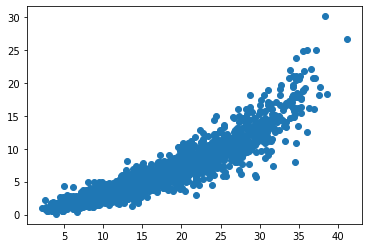

In [9]:
x =df["MPG"]
y= df["PPG"]


plt.scatter(x, y)
plt.show()

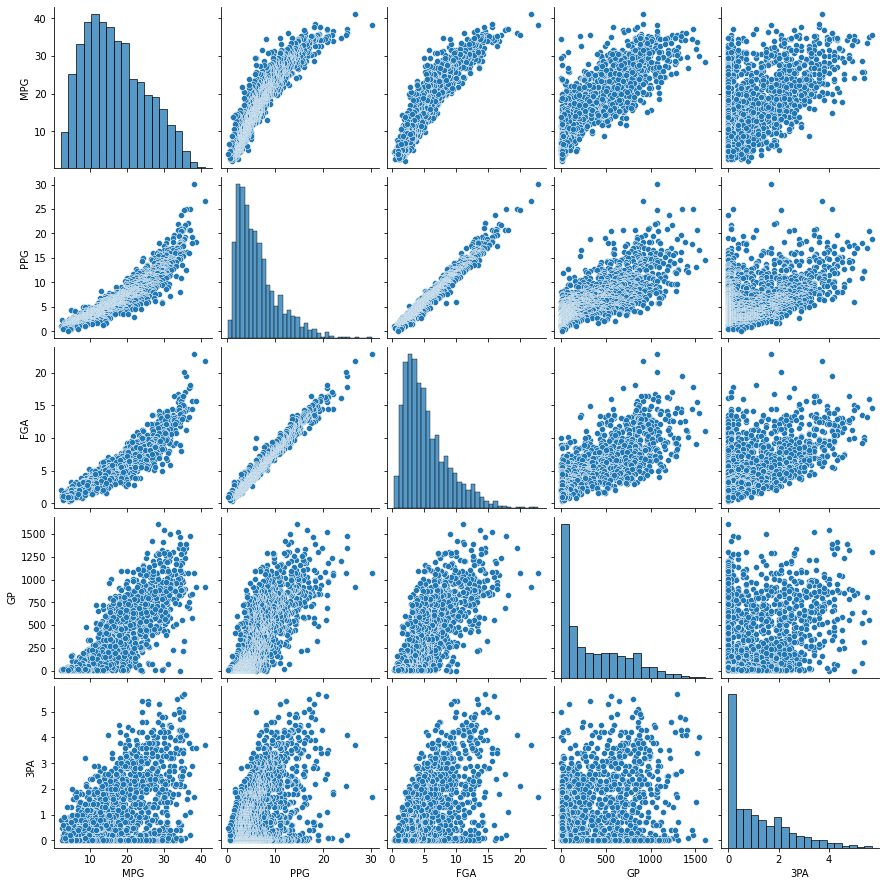

In [10]:
sns.pairplot(df[['MPG','PPG', 'FGA', 'GP',"3PA"]])

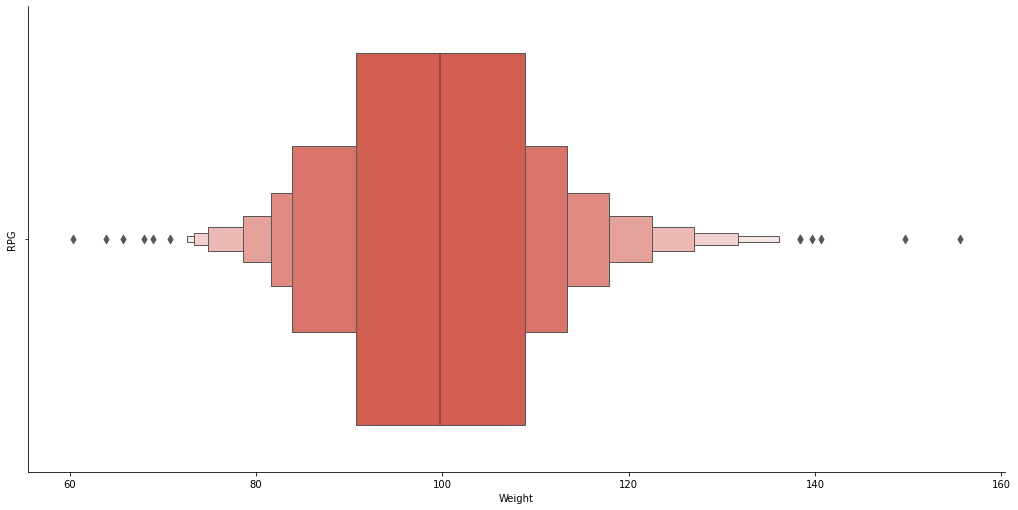

In [22]:
g = sns.catplot(
    x='Weight', 
    data =df,
    kind='boxen', 
    hue='RPG',
    palette=['#E74C3C', '#7FB3D5', '#27AE60'],
    height=7, 
    aspect=2,
    legend=False,
    ).set_axis_labels('Weight', 'RPG')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Rank            1642 non-null   int64   
 1   Name            1642 non-null   object  
 2   GP              1642 non-null   int64   
 3   MPG             1642 non-null   float64 
 4   FGM             1642 non-null   float64 
 5   FGA             1642 non-null   float64 
 6   FG%             1642 non-null   float64 
 7   3PM             1642 non-null   float64 
 8   3PA             1642 non-null   float64 
 9   3P%             1642 non-null   float64 
 10  FTM             1642 non-null   float64 
 11  FTA             1642 non-null   float64 
 12  FT%             1642 non-null   float64 
 13  TOV             1642 non-null   float64 
 14  PF              1642 non-null   float64 
 15  ORB             1642 non-null   float64 
 16  DRB             1642 non-null   float64 
 17  RPG           

In [18]:
df.describe()

,Rank,GP,MPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,PF,ORB,DRB,RPG,APG,SPG,BPG,PPG,Height,Weight
count,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,...,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000,1642.000000
mean,2256.832521,355.697929,16.889342,2.381181,5.418331,0.428495,0.375822,1.132217,0.239999,1.156699,...,1.674482,0.856760,2.024726,2.884957,1.399269,0.538368,0.333739,6.296041,200.388697,99.421590
std,1241.658922,353.504946,8.227678,1.636640,3.439694,0.072805,0.450682,1.215487,0.150543,0.974792,...,0.732064,0.684605,1.342312,1.951820,1.359275,0.360718,0.383409,4.351999,9.209264,12.656641
min,1.000000,1.000000,2.200000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.100000,160.020000,60.327736
25%,1225.500000,51.000000,10.200000,1.125000,2.900000,0.397000,0.000000,0.100000,0.134250,0.500000,...,1.100000,0.300000,1.100000,1.500000,0.500000,0.300000,0.100000,3.000000,193.040000,90.718400
50%,2282.000000,220.000000,15.800000,2.000000,4.500000,0.432000,0.200000,0.700000,0.290000,0.900000,...,1.700000,0.700000,1.700000,2.400000,0.900000,0.500000,0.200000,5.200000,200.660000,99.790240
75%,3320.750000,609.000000,22.675000,3.200000,7.100000,0.471750,0.600000,1.900000,0.347000,1.500000,...,2.200000,1.200000,2.600000,3.800000,1.800000,0.700000,0.400000,8.300000,208.280000,108.862080
max,4517.000000,1611.000000,41.100000,11.400000,22.900000,0.702000,2.300000,5.700000,1.000000,7.000000,...,4.000000,4.800000,8.400000,13.100000,10.500000,2.300000,3.100000,30.100000,228.600000,155.582056
